In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

### 1. Reading raw data 

In [5]:
#gdis data 
gdis = pd.read_csv('../../data/pend-gdis-1960-2018-disasterlocations.csv')
#get emdat dataset
emdat = pd.read_csv('../../data/emdat_public_2022_09_21_query_uid-47Yzpr.csv', skiprows=[0,1,2,3,4,5])
gdis.head(2)

C:\Users\samin\AppData\Local\Temp\ipykernel_32496\610470096.py:4: DtypeWarning: Columns (8,16,17,18,19,24,25,26,27,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  emdat = pd.read_csv('../../data/emdat_public_2022_09_21_query_uid-47Yzpr.csv', skiprows=[0,1,2,3,4,5])


,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309


In [6]:
# This is where we obtain the statistical features
emdat.head(2)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN


In [7]:
#select certain columns from emdat and join with gdis 
# we grab the disaster number and convert it into string format and grab everything except for the last 4 ( so only the dates)
emdat['disasterno'] = emdat['Dis No'].str[:-4] #format disasterno to merge  

#These are the columns that we want to keep  , the features below are left out!
cols = ['disasterno', 'Year', 'Event Name', 
#         'Disaster Type', 'Disaster Subtype', 
#         'Region', 'Continent', #'Location',
        'Start Year', 'Start Month', 'Start Day', 
        'End Year', 'End Month','End Day',  
        "Total Damages, Adjusted ('000 US$)"] 

emdat = emdat[cols]


In [8]:
#join emdat and gdis into one dataframe
gdis = pd.merge(emdat, gdis, on = 'disasterno', how='right')

In [9]:
gdis.head(3)

,disasterno,Year,Event Name,Start Year,Start Month,Start Day,End Year,End Month,End Day,"Total Damages, Adjusted ('000 US$)",...,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,latitude,longitude
0,2009-0631,2009.0,NaN,2009.0,12.0,27.0,2010.0,1.0,8.0,NaN,...,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,42.020948,19.418317
1,2009-0631,2009.0,NaN,2009.0,12.0,27.0,2010.0,1.0,8.0,NaN,...,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,41.959294,19.514309
2,2001-0146,2001.0,NaN,2001.0,4.0,2.0,2001.0,4.0,9.0,NaN,...,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,-17.093484,15.665758


In [10]:
#print 
gdis = gdis.drop_duplicates(subset=['id'])
print('shape', gdis.shape)
gdis.head(2)

shape (9924, 27)


,disasterno,Year,Event Name,Start Year,Start Month,Start Day,End Year,End Month,End Day,"Total Damages, Adjusted ('000 US$)",...,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,latitude,longitude
0,2009-0631,2009.0,NaN,2009.0,12.0,27.0,2010.0,1.0,8.0,NaN,...,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,42.020948,19.418317
2,2001-0146,2001.0,NaN,2001.0,4.0,2.0,2001.0,4.0,9.0,NaN,...,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,-17.093484,15.665758


In [11]:
#latitude range from -90 to 90, longitude range from -180 to 180 

#convert lat and long into 1 degree grid: correspond to 100*100km 
gdis['lat_grid'] = np.digitize(np.array(gdis['latitude']),np.arange(-90,90,1))
gdis['lon_grid'] = np.digitize(np.array(gdis['longitude']),np.arange(-180,180,1)) 
#compute the grid pair id 
gdis['grid_id'] = list(zip(gdis['lat_grid'],gdis['lon_grid']))
print('total number of grid pairs', len(gdis.grid_id.value_counts()))

total number of grid pairs 2852


In [12]:
gdis.head(2)

,disasterno,Year,Event Name,Start Year,Start Month,Start Day,End Year,End Month,End Day,"Total Damages, Adjusted ('000 US$)",...,adm3,location,historical,hist_country,disastertype,latitude,longitude,lat_grid,lon_grid,grid_id
0,2009-0631,2009.0,NaN,2009.0,12.0,27.0,2010.0,1.0,8.0,NaN,...,Ana E Malit,Ana E Malit,0,NaN,flood,42.020948,19.418317,133,200,"(133, 200)"
2,2001-0146,2001.0,NaN,2001.0,4.0,2.0,2001.0,4.0,9.0,NaN,...,Onjiva,Onjiva,0,NaN,flood,-17.093484,15.665758,73,196,"(73, 196)"


In [13]:
#count number of locations in each grid_id: ideally just 1 location per grid_id, if not, I can make grid finer. 
# gdis.groupby('grid_id').agg({'location':'nunique'}).sort_values(by='location').value_counts()

In [14]:
# the grid with most regions 
# gdis.loc[gdis['grid_id']==(113, 295)].head(5)

### 2. Construct X

In [15]:
#pivot function: change rows of info into tables 
def pivot(df_in, id_col='disastertype', id_list=['Flood']):
    df = df_in.reset_index(drop = True)


    for id in id_list:
        #initialize columns
        df[id+'_bin'] = 0
        df[id+'_amt'] = 0
        df[id+'_ct'] = 0
        

        df.loc[(df[id_col]==id), id+'_bin'] = 1
        df.loc[(df[id_col]==id), id+'_amt'] = df["Total Damages, Adjusted ('000 US$)"].astype(float)
        df.loc[(df[id_col]==id), id+'_ct'] = 1

    return df

In [16]:
# id_list= df_sub['Disaster Type'].unique()
id_list= gdis['disastertype'].unique().tolist()
print(id_list)
df_pivot= pivot(gdis, id_col = 'disastertype', id_list = id_list)
df_pivot

['flood', 'storm', 'earthquake', 'extreme temperature ', 'landslide', 'volcanic activity', 'drought', 'mass movement (dry)']


,disasterno,Year,Event Name,Start Year,Start Month,Start Day,End Year,End Month,End Day,"Total Damages, Adjusted ('000 US$)",...,landslide_ct,volcanic activity_bin,volcanic activity_amt,volcanic activity_ct,drought_bin,drought_amt,drought_ct,mass movement (dry)_bin,mass movement (dry)_amt,mass movement (dry)_ct
0,2009-0631,2009.0,NaN,2009.0,12.0,27.0,2010.0,1.0,8.0,NaN,...,0,0,0.0,0,0,0.0,0,0,0.0,0
1,2001-0146,2001.0,NaN,2001.0,4.0,2.0,2001.0,4.0,9.0,NaN,...,0,0,0.0,0,0,0.0,0,0,0.0,0
2,2009-0092,2009.0,NaN,2009.0,3.0,1.0,2009.0,4.0,16.0,NaN,...,0,0,0.0,0,0,0.0,0,0,0.0,0
3,2010-0105,2010.0,NaN,2010.0,3.0,1.0,2010.0,3.0,17.0,NaN,...,0,0,0.0,0,0,0.0,0,0,0.0,0
4,1995-0082,1995.0,NaN,1995.0,5.0,15.0,1995.0,5.0,15.0,1422569.0,...,0,0,0.0,0,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,1960-0011,1960.0,Manam,1960.0,3.0,17.0,1960.0,3.0,17.0,NaN,...,0,1,NaN,1,0,0.0,0,0,0.0,0
9920,2009-9633,2009.0,NaN,2009.0,NaN,NaN,2010.0,NaN,NaN,NaN,...,0,0,0.0,0,1,NaN,1,0,0.0,0
9921,1990-9289,1990.0,NaN,1990.0,NaN,NaN,1990.0,NaN,NaN,NaN,...,0,0,0.0,0,1,NaN,1,0,0.0,0
9922,1969-9069,1969.0,NaN,1969.0,NaN,NaN,1971.0,NaN,NaN,73867.0,...,0,0,0.0,0,1,73867.0,1,0,0.0,0


In [17]:
#aggregate columns by year
def aggregate_yrly(df):
    #aggregate count
    col_ct = [col for col in df.columns if '_ct' in col]
    df_ct = df.groupby(['grid_id','year'])[col_ct].agg('sum')
    
    #aggregate amount 
    col_amt = [col for col in df.columns if '_amt' in col]
    df_amt = df.groupby(['grid_id','year'])[col_amt].agg('sum')
    
    #aggregate binary
    col_bin = [col for col in df.columns if '_bin' in col]
    df_bin= df.groupby(['grid_id','year'])[col_bin].agg('max')

    #join
    df1= pd.concat([df_amt, df_ct], axis=1)
    df_out = pd.concat([df1, df_bin], axis=1)
    return df_out.reset_index()
df_yrly = aggregate_yrly(df_pivot)

In [18]:
df_yrly

,grid_id,year,flood_amt,storm_amt,earthquake_amt,extreme temperature _amt,landslide_amt,volcanic activity_amt,drought_amt,mass movement (dry)_amt,...,drought_ct,mass movement (dry)_ct,flood_bin,storm_bin,earthquake_bin,extreme temperature _bin,landslide_bin,volcanic activity_bin,drought_bin,mass movement (dry)_bin
0,"(37, 108)",1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,"(42, 108)",2017,2211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,"(42, 111)",1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,"(44, 107)",2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,"(44, 107)",2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,"(157, 311)",1998,5818.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
8676,"(157, 311)",2007,33655.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
8677,"(157, 311)",2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
8678,"(158, 207)",2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


flood_ct
0           1032
1            983
2            361
3            190
4             81
dtype: int64


array([[<Axes: title={'center': 'flood_ct'}>]], dtype=object)

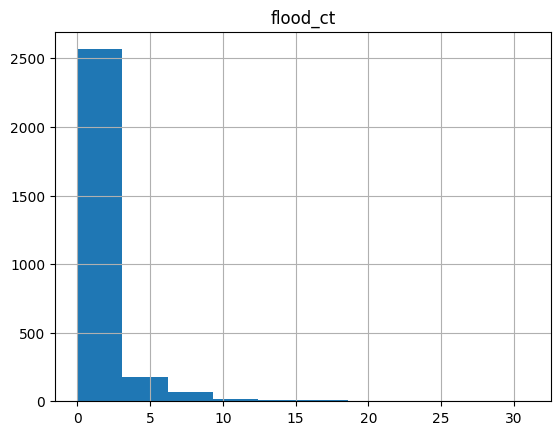

In [19]:
#count how many flood for each grid over all data 
#sum grid id with total flood incidents
flood_ct = df_yrly.groupby('grid_id').agg({'flood_ct':'sum'}) 
print(flood_ct.value_counts().head())
flood_ct.hist() #[['grid_id','flood_ct']]

#1032 grids have no flood before, 983 have 1 flood only, 361 have 2 f
# loods 

In [20]:
#create labels for training NLP 
flood_ct

,flood_ct
grid_id,
"(37, 108)",1
"(42, 108)",1
"(42, 111)",0
"(44, 107)",0
"(44, 349)",1
...,...
"(156, 217)",1
"(157, 157)",0
"(157, 311)",2


In [51]:
#create a new dataframe with only unique grid_id'scaler
df_unique = df_yrly.drop_duplicates(subset=['grid_id'])
df_unique.shape


(2852, 26)

In [21]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#make a function to normalize the data for certain columns
#df is a dataframe, cols is a list of columns to normalize
def normalize(df, cols):
    df[cols] = scaler.fit_transform(df[cols])
    return df

cols = df_yrly.columns[2:10]
df_yrly = normalize(df_yrly, cols)
df_yrly

#normalize columns 3-10


,grid_id,year,flood_amt,storm_amt,earthquake_amt,extreme temperature _amt,landslide_amt,volcanic activity_amt,drought_amt,mass movement (dry)_amt,...,drought_ct,mass movement (dry)_ct,flood_bin,storm_bin,earthquake_bin,extreme temperature _bin,landslide_bin,volcanic activity_bin,drought_bin,mass movement (dry)_bin
0,"(37, 108)",1990,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,"(42, 108)",2017,0.000044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,"(42, 111)",1991,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,"(44, 107)",2007,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,"(44, 107)",2010,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,"(157, 311)",1998,0.000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
8676,"(157, 311)",2007,0.000675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
8677,"(157, 311)",2012,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
8678,"(158, 207)",2005,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


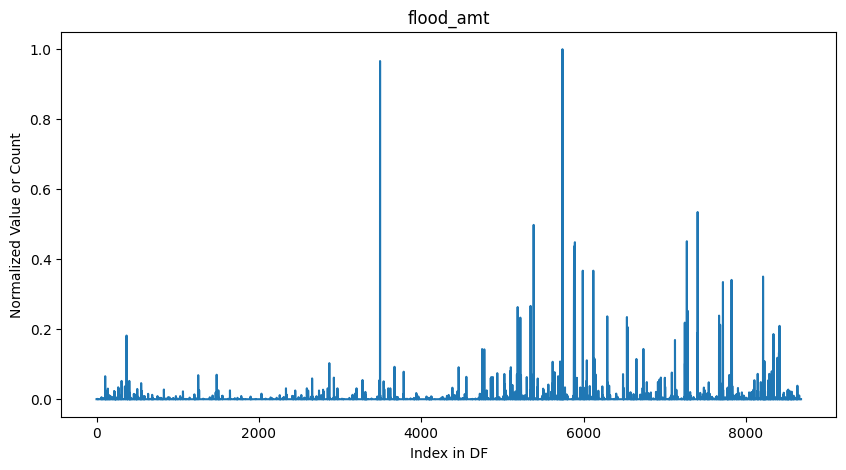

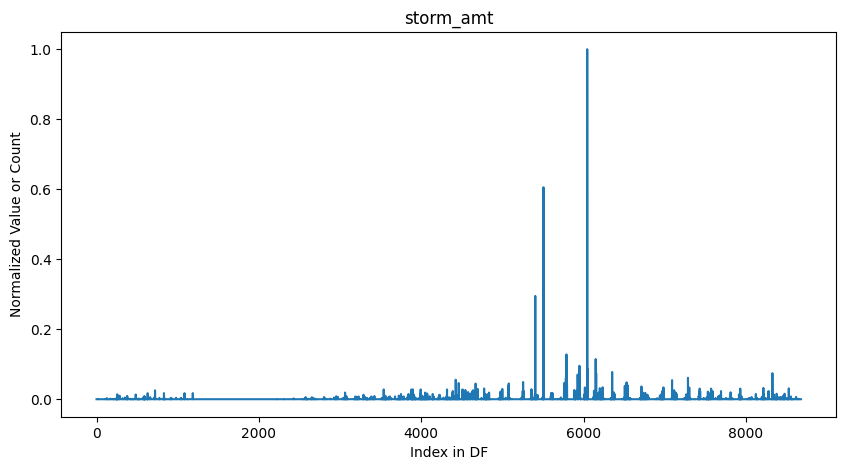

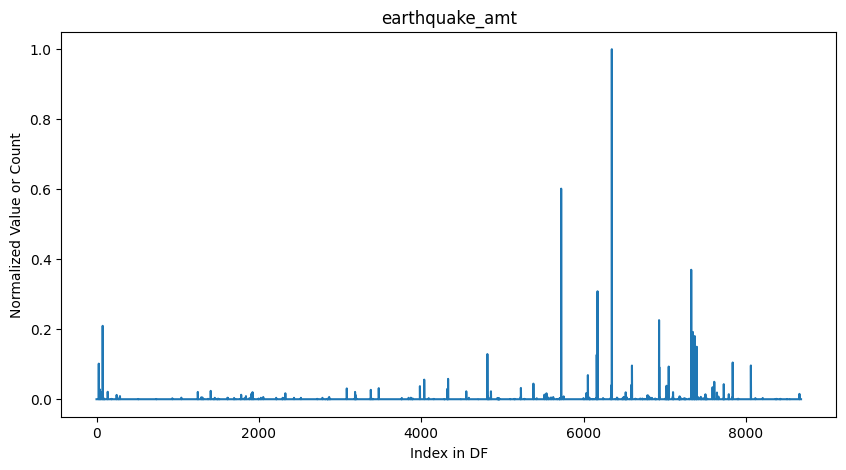

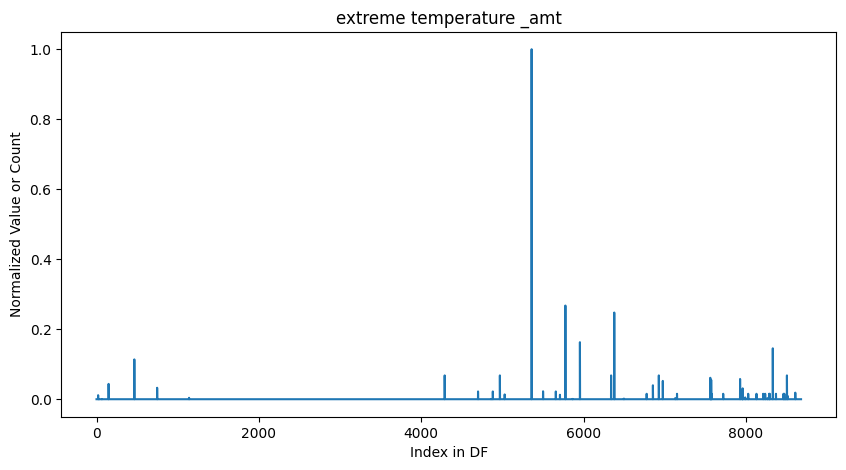

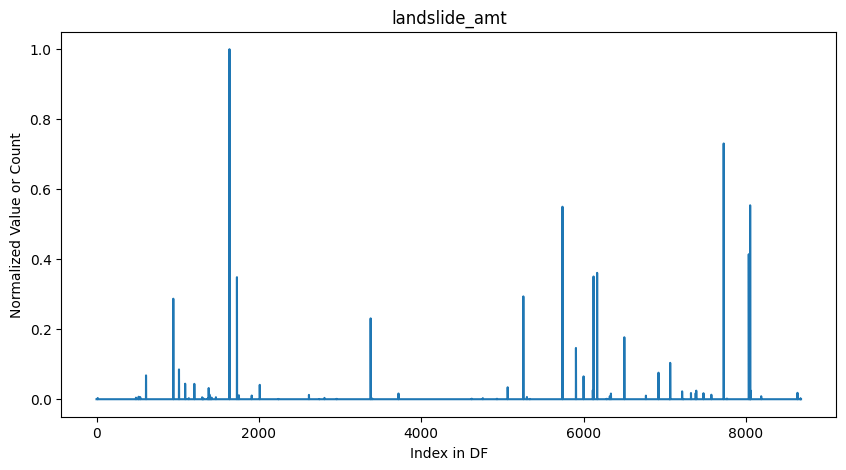

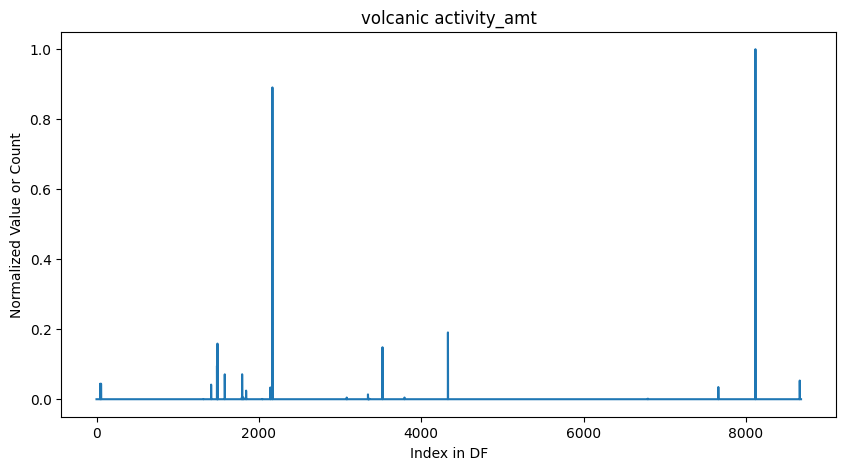

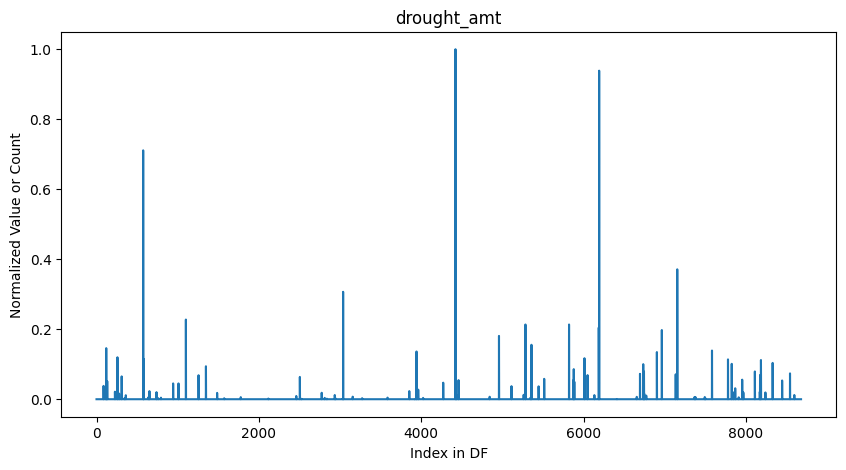

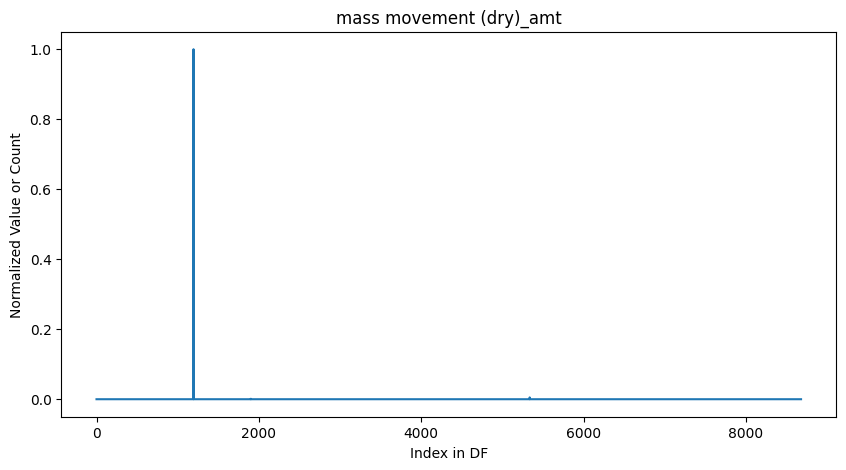

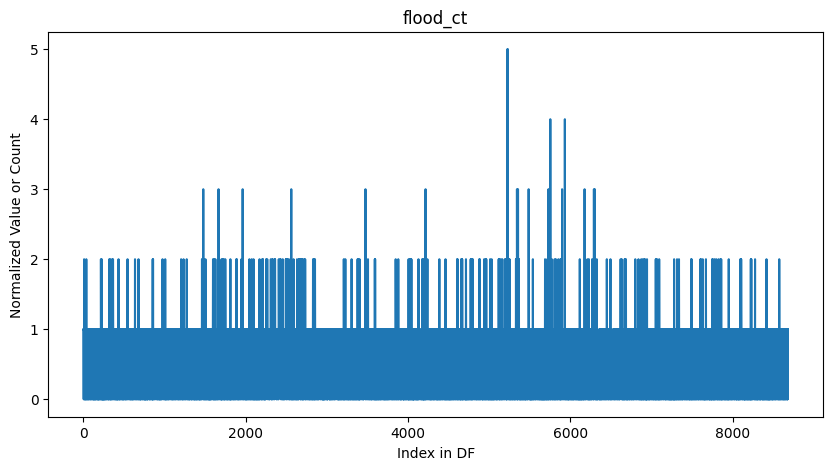

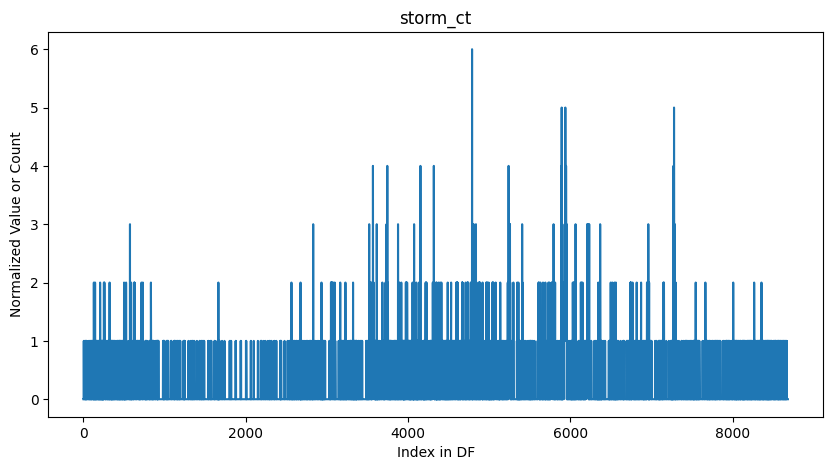

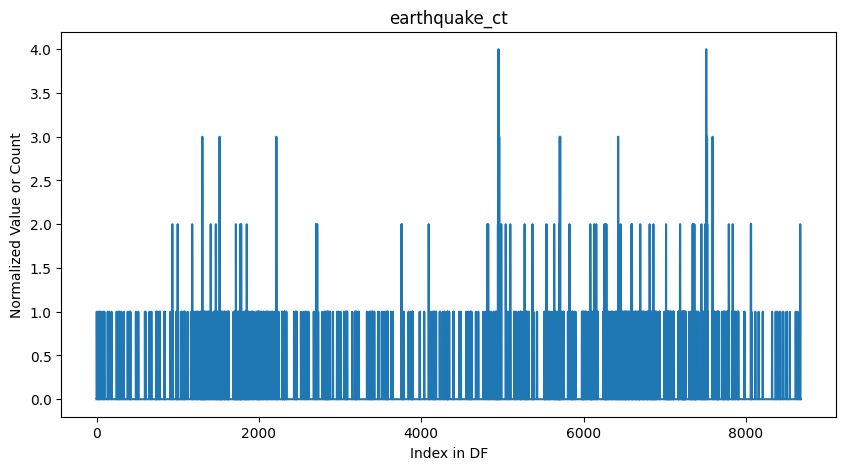

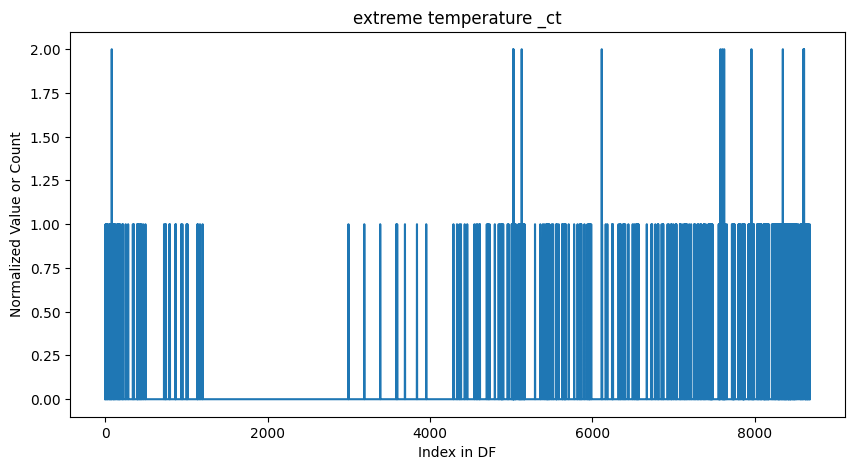

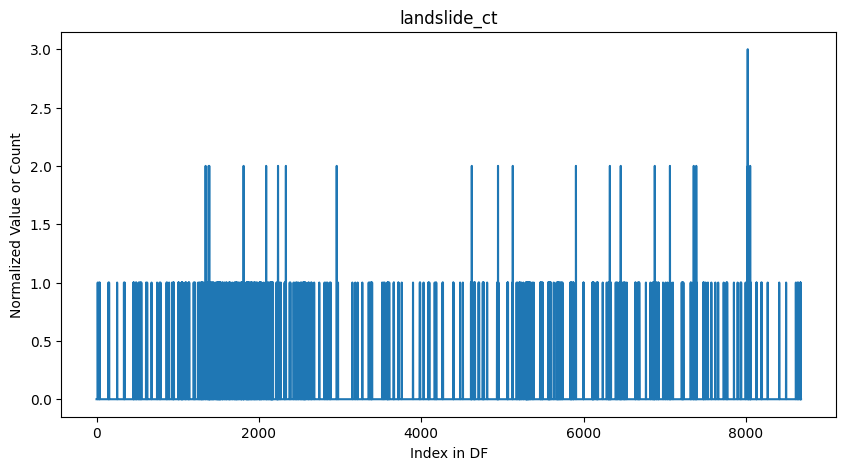

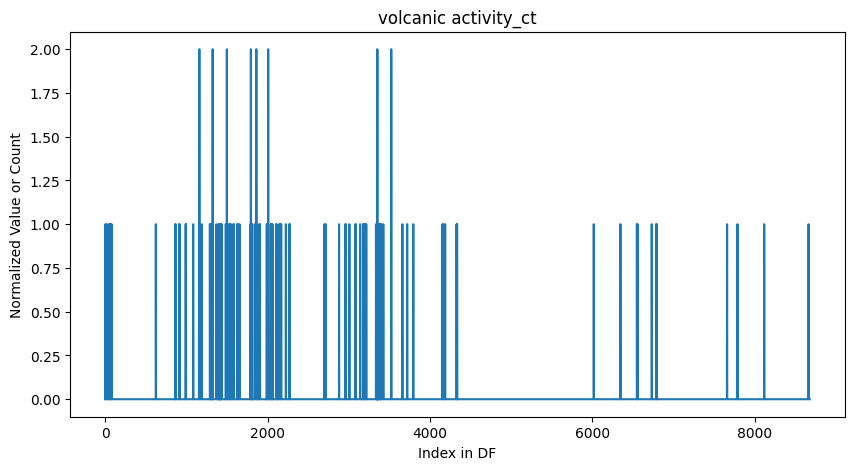

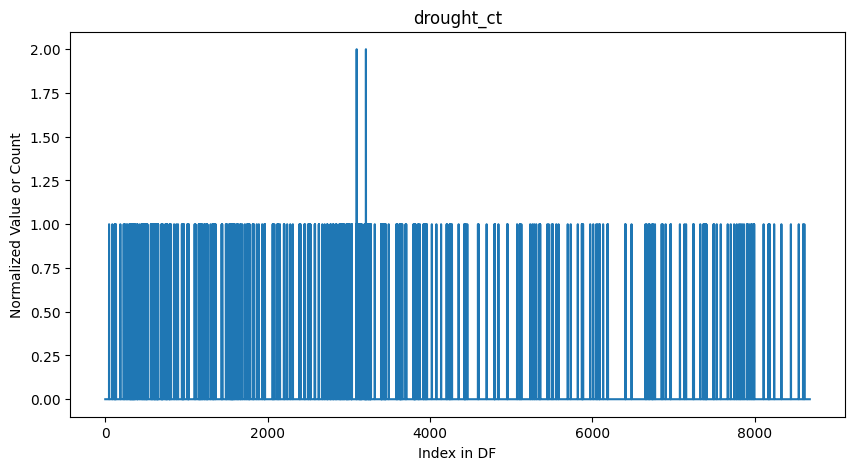

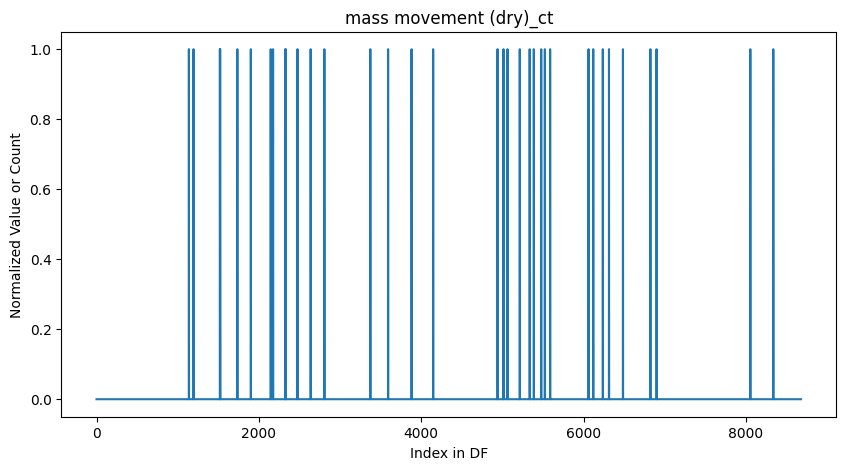

In [22]:
#Create Plots for the amounts and counts of each disaster type
df_yrly.columns[2:18]
for i in range(2,18):
    plt.figure(figsize=(10,5))
    plt.plot(df_yrly.iloc[:,i])
    plt.title(df_yrly.columns[i])
    plt.xlabel('Index in DF')
    plt.ylabel('Normalized Value or Count')
    plt.show()



### Construct Y Master
look up table for all the previous flood events

In [23]:
bin_col =  [col for col in df_yrly.columns if '_bin' in col]
df_yrly_bin = df_yrly[['grid_id','year'] + bin_col]

In [24]:
# #get a list of disasters and flood_id 
# all_dis = gdis[['grid_id','Year','disastertype']]

# #
# flood = all_dis.loc[all_dis['disastertype']=='flood']
# flood

In [25]:
# get a list of grid_ids 
grid_id = gdis['grid_id'].unique()
# get a list of year information 
print(gdis.Year.min(), gdis.Year.max())
year_id = np.arange(1960, 2019, 1) 
#create multi-index: each grid id, spanning over the years 
idd = pd.MultiIndex.from_product([grid_id, year_id],
                           names=['grid_id', 'year'])

#length should be |years| * |grid_ids| 
print(len(idd))
#get dataframe 
idd = idd.to_frame().reset_index(drop=True)


1960.0 2018.0
168268


In [26]:
#master disaster targets for all years and all ids: 
#merge with df_yrly 
y_master = pd.merge(idd, df_yrly_bin, on=['grid_id','year'], how='left').fillna(0)

#keep just the binary
# y_master.sum(axis=0)

In [27]:
#check: 
print(y_master['flood_bin'].sum()) #total number of binary flood targets 

#total number of flood incidents: 
print(gdis.loc[gdis['disastertype']=='flood'].shape[0])

#the two numbers are slightly different, but that's because some country have more than 1 flood per year 

4007.0
4274


In [28]:
# construct next n year target -> look up this table 
y_master

,grid_id,year,flood_bin,storm_bin,earthquake_bin,extreme temperature _bin,landslide_bin,volcanic activity_bin,drought_bin,mass movement (dry)_bin
0,"(133, 200)",1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"(133, 200)",1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"(133, 200)",1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"(133, 200)",1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"(133, 200)",1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
168263,"(99, 210)",2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168264,"(99, 210)",2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168265,"(99, 210)",2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168266,"(99, 210)",2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Filter data to previously flooded regions 


In [29]:
#step 1: filter xy_df to those grid_ids with previous frequent flooding history 
agg = df_yrly.groupby('grid_id').agg({'flood_bin':'sum'})
grid_id_ls = agg.loc[agg['flood_bin']>=2].index.tolist()
print('no of grid_ids selected', len(grid_id_ls))


#step 2: interpolate years to record all years, fill with 0 without any flood using idd 
#create multi-index: each grid id, spanning over the years 
year_id = np.arange(1960, 2019, 1) 
idd = pd.MultiIndex.from_product([grid_id_ls, year_id],
                           names=['grid_id', 'year'])

#length should be |years| * |grid_ids| 
print('len of idd', len(idd))
#get dataframe 
idd = idd.to_frame().reset_index(drop=True)


no of grid_ids selected 818
len of idd 48262


In [30]:
df_yrly.shape

(8680, 26)

## attach NLP feature

In [31]:
import pickle 
print(pickle.format_version)

#load processed nlp features: 
#note: you can load other nlp features too, they all start with 'nlp_*' 
file = open('../../data/nlp_cls.pkl', 'rb') 
# dump information to that file
df_nlp = pickle.load(file)
# close the file
file.close()

4.0


In [32]:
df_nlp.head(5)

,grid_id,location,txt,0,1,2,3,4,5,6,...,758,759,760,761,762,763,764,765,766,767
0,"(37, 108)",[Punta Arenas],"Located on the Brunswick Peninsula, Punta Aren...",0.343823,-0.183766,-0.133343,-0.174630,-0.384334,0.177323,0.325871,...,0.252422,0.350722,-0.252353,0.234174,-0.087969,0.053727,-0.113621,-0.532688,0.027508,0.107483
1,"(42, 108)",[ O'Higgins],In pre-Quaternary times extensive Nothofagus f...,0.346114,-0.077920,-0.145482,-0.264759,-0.341341,0.112861,0.257900,...,0.379547,0.239801,-0.178940,0.272704,-0.045932,0.153756,-0.183036,-0.383590,0.115224,0.003133
2,"(42, 111)",[Santa Cruz],Santa Cruz is on the northern edge of Monterey...,0.463565,-0.150352,0.087158,-0.142650,-0.243297,0.058829,0.224863,...,0.442357,0.248162,-0.105127,0.095391,-0.023990,-0.105167,-0.131937,-0.318208,0.131727,0.045016
3,"(44, 107)","[Aysen region, Aisen del Gral. Carlos Ibañez d...",The Aysén del General Carlos Ibáñez del Campo ...,0.263078,-0.231673,-0.128674,-0.009170,-0.415736,0.151071,0.273869,...,0.272101,0.254180,-0.354262,0.236961,0.008364,0.053270,-0.124575,-0.427968,-0.038295,0.092068
4,"(44, 349)","[Gore, Invercargill]","Politically, Southland proper extends from Fio...",0.334092,-0.157417,-0.044592,-0.131552,-0.099580,-0.055060,0.277064,...,0.253978,0.235583,-0.144775,0.134849,-0.023725,-0.047307,-0.055112,-0.242521,0.113885,0.104170


In [33]:
#attach nlp to xy_df 

df_yrly

,grid_id,year,flood_amt,storm_amt,earthquake_amt,extreme temperature _amt,landslide_amt,volcanic activity_amt,drought_amt,mass movement (dry)_amt,...,drought_ct,mass movement (dry)_ct,flood_bin,storm_bin,earthquake_bin,extreme temperature _bin,landslide_bin,volcanic activity_bin,drought_bin,mass movement (dry)_bin
0,"(37, 108)",1990,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,"(42, 108)",2017,0.000044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,"(42, 111)",1991,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,"(44, 107)",2007,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,"(44, 107)",2010,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,"(157, 311)",1998,0.000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
8676,"(157, 311)",2007,0.000675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
8677,"(157, 311)",2012,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
8678,"(158, 207)",2005,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
# pwd
import sys
# setting path
sys.path.append('../../src')

#import model training module 
import models as m 

#split training and testing 
from sklearn.model_selection import train_test_split
# import shap
from sklearn import metrics


In [35]:
#attach target for a particular disease for next n years, using y_master  
def attach_target(x_df, y_master, disaster, next_n): 
    y = y_master.copy()
    #shift years
    y['year'] = y['year'] - next_n
    #keep for particular disaster 
    y = y[['grid_id','year',disaster+'_bin']]
    y = y.rename(columns={disaster +'_bin': 'target_' + disaster + '_'+ str(next_n)})
    xy_df = pd.merge(x_df, y, on = ['grid_id','year'], how='inner')
    return xy_df


In [36]:
#construct xy_df 
n_pred = 1

xy_df = attach_target(df_yrly, y_master, 'flood', n_pred)
print('length of xy_df', len(xy_df))

#select to those id pass the filtering criteria 
xy_df_sub = xy_df.loc[xy_df['grid_id'].isin(grid_id_ls)]
#interpolate missing years to have no flood 
xy_df_sub = pd.merge(idd, xy_df_sub, on=['grid_id','year'], how='left').fillna(0)

print('length of xy_df_sub', len(xy_df_sub))

print('imbalance', xy_df_sub.filter(regex='target').sum()/len(xy_df_sub))



length of xy_df 8464
length of xy_df_sub 48262
imbalance target_flood_1    0.015188
dtype: float64


In [37]:
#merge with NLP 
xy_df_sub1 = pd.merge(xy_df_sub, df_nlp.drop(['location','txt'], axis=1), on=['grid_id'], how='left') 
print('total feature n', xy_df_sub1.shape)
#construct x,y train and test set 
x = xy_df_sub1.drop(xy_df_sub1.filter(regex='target').columns, axis=1)#drop target col 
x = x.select_dtypes(['number'])#drop index col
y = xy_df_sub1.filter(regex='target') #filter to cols containing target 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

total feature n (48262, 795)


In [38]:
xy_df_sub1

,grid_id,year,flood_amt,storm_amt,earthquake_amt,extreme temperature _amt,landslide_amt,volcanic activity_amt,drought_amt,mass movement (dry)_amt,...,758,759,760,761,762,763,764,765,766,767
0,"(45, 348)",1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194967,0.244842,-0.087730,0.139299,-0.059330,-0.090109,-0.174031,-0.160151,0.071087,0.079622
1,"(45, 348)",1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194967,0.244842,-0.087730,0.139299,-0.059330,-0.090109,-0.174031,-0.160151,0.071087,0.079622
2,"(45, 348)",1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194967,0.244842,-0.087730,0.139299,-0.059330,-0.090109,-0.174031,-0.160151,0.071087,0.079622
3,"(45, 348)",1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194967,0.244842,-0.087730,0.139299,-0.059330,-0.090109,-0.174031,-0.160151,0.071087,0.079622
4,"(45, 348)",1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194967,0.244842,-0.087730,0.139299,-0.059330,-0.090109,-0.174031,-0.160151,0.071087,0.079622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48257,"(157, 311)",2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.233096,0.222941,-0.370883,-0.082667,0.028296,0.257389,0.055603,-0.518554,0.148926,0.040266
48258,"(157, 311)",2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.233096,0.222941,-0.370883,-0.082667,0.028296,0.257389,0.055603,-0.518554,0.148926,0.040266
48259,"(157, 311)",2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.233096,0.222941,-0.370883,-0.082667,0.028296,0.257389,0.055603,-0.518554,0.148926,0.040266
48260,"(157, 311)",2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.233096,0.222941,-0.370883,-0.082667,0.028296,0.257389,0.055603,-0.518554,0.148926,0.040266


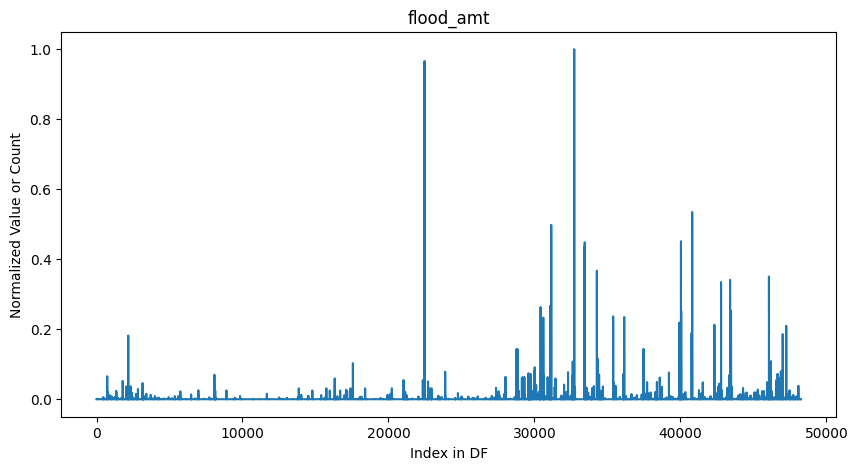

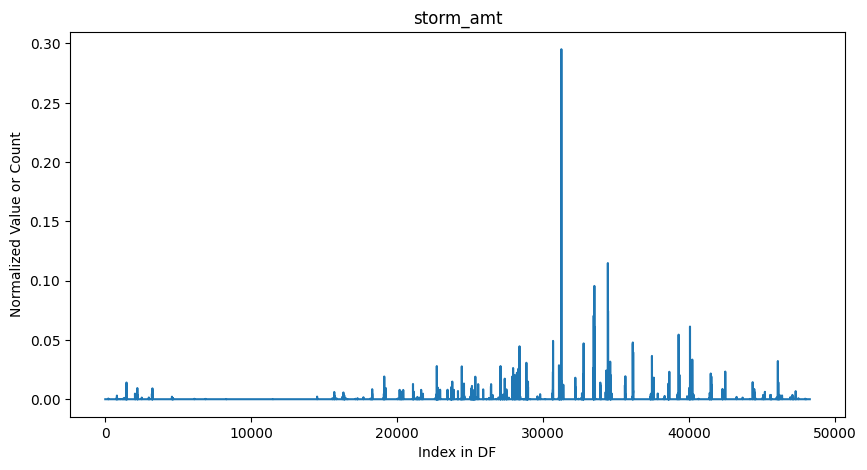

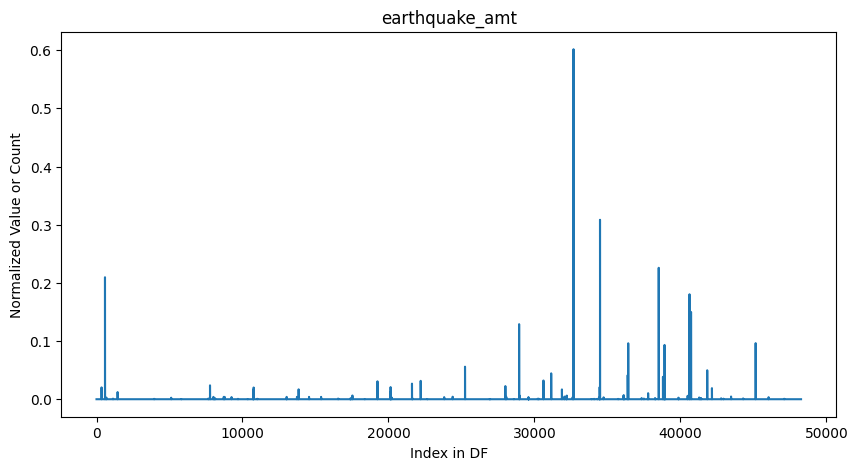

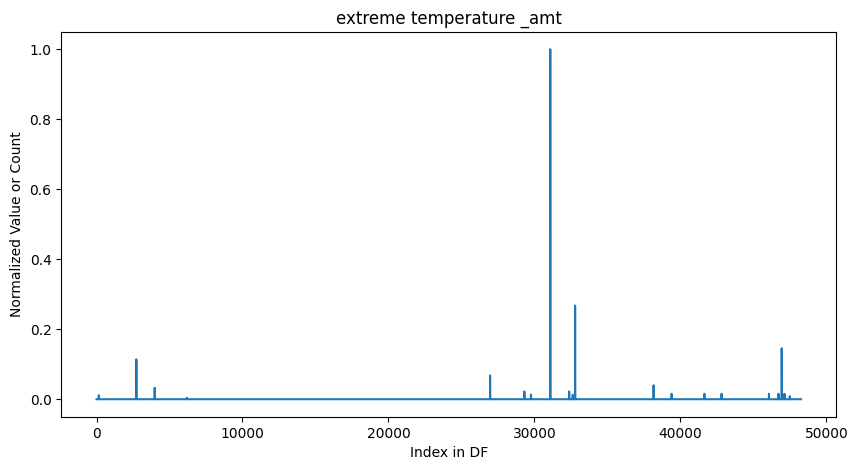

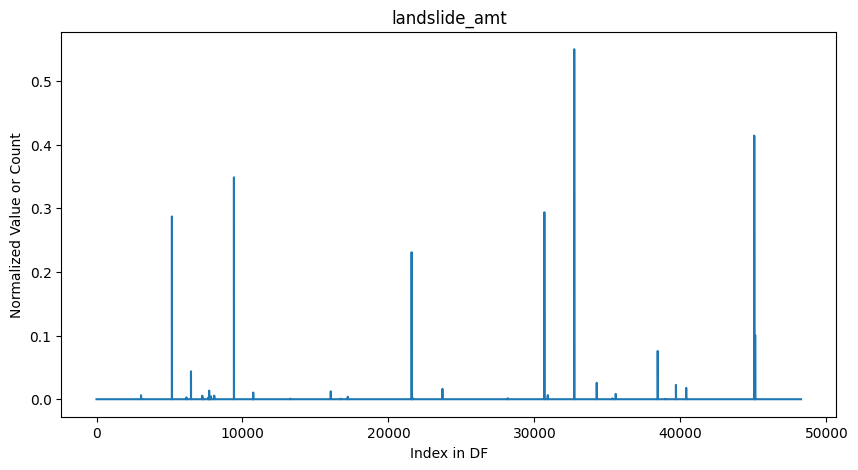

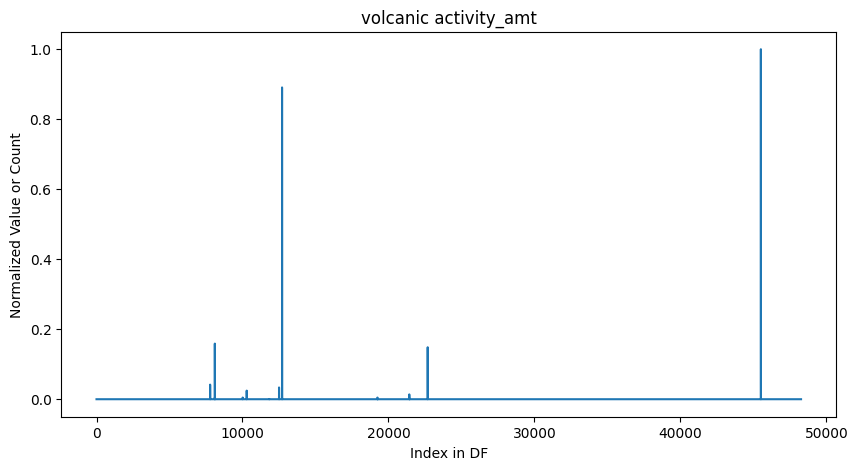

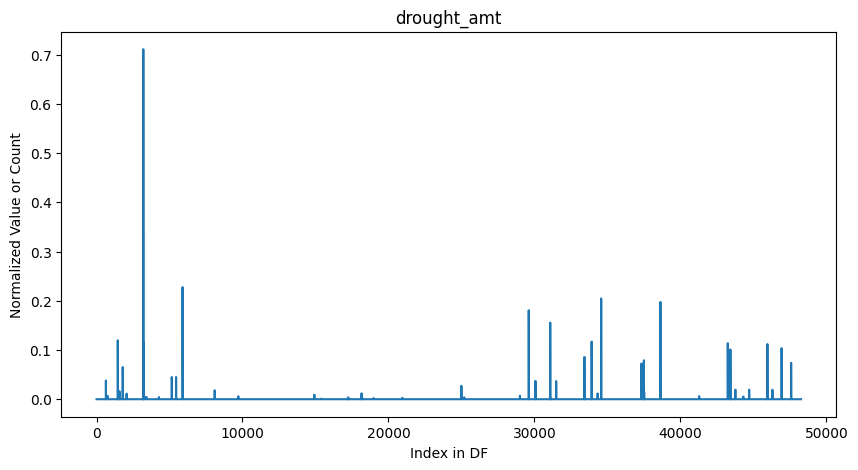

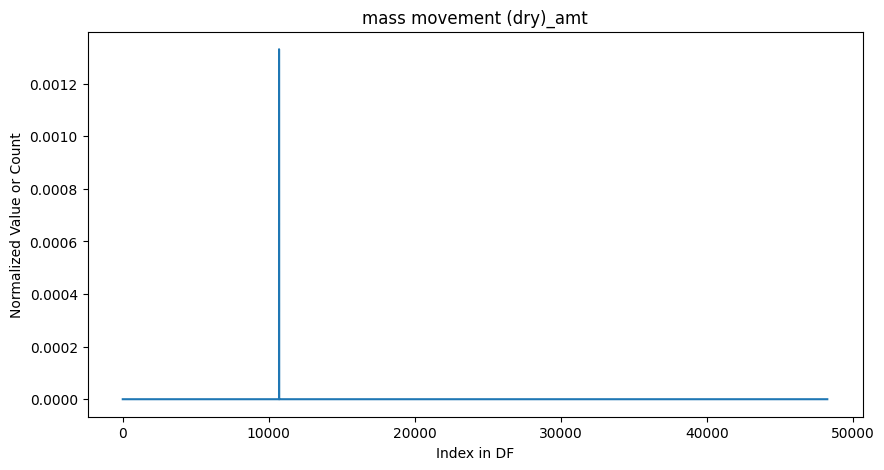

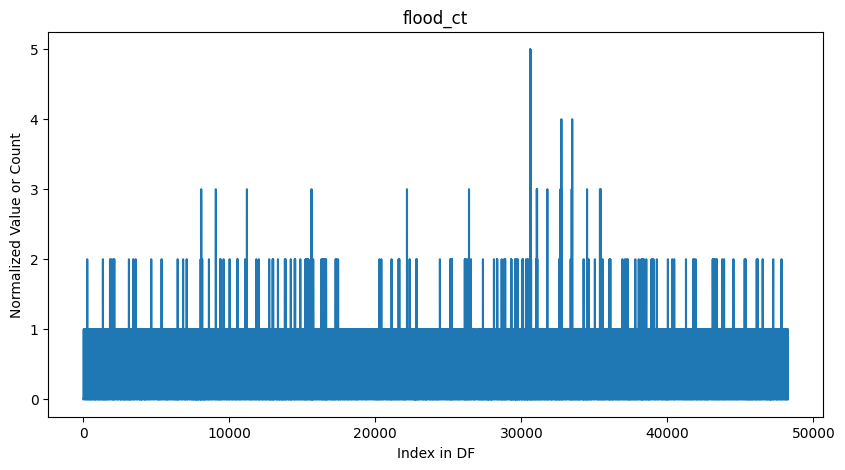

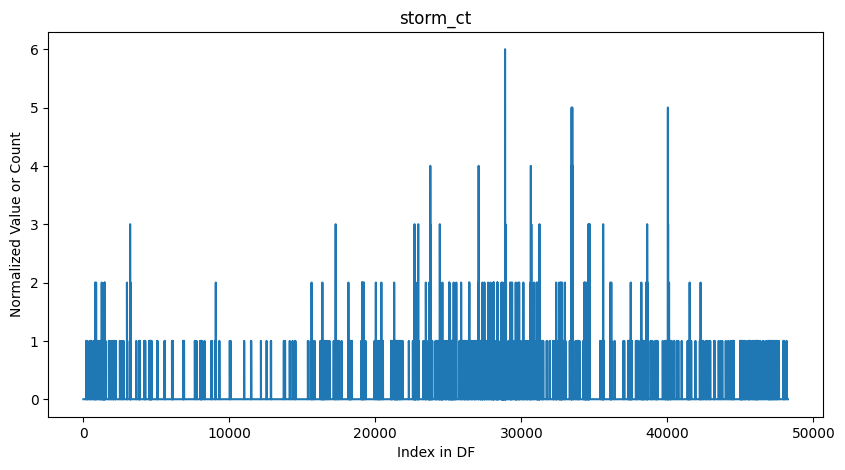

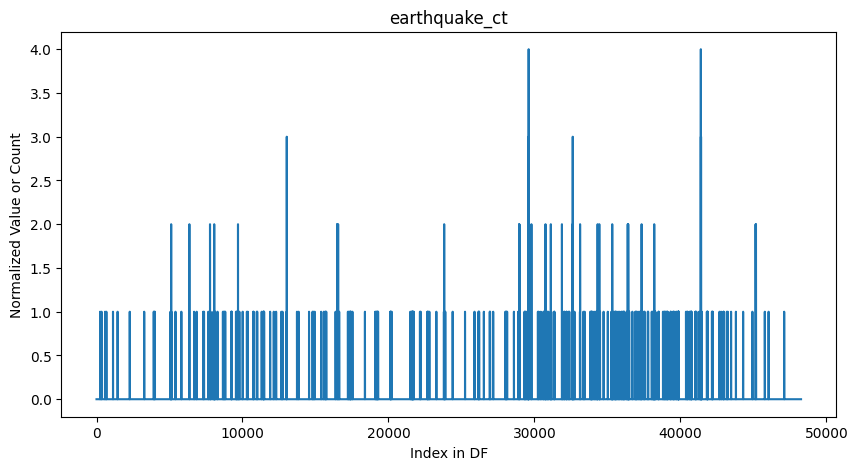

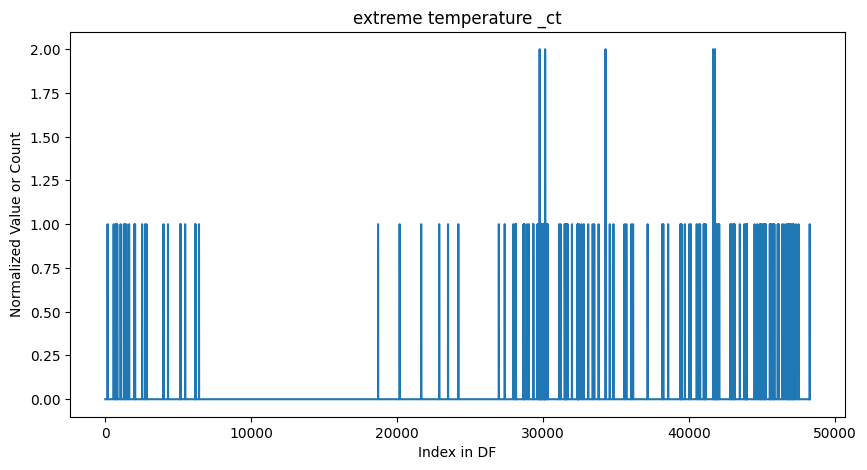

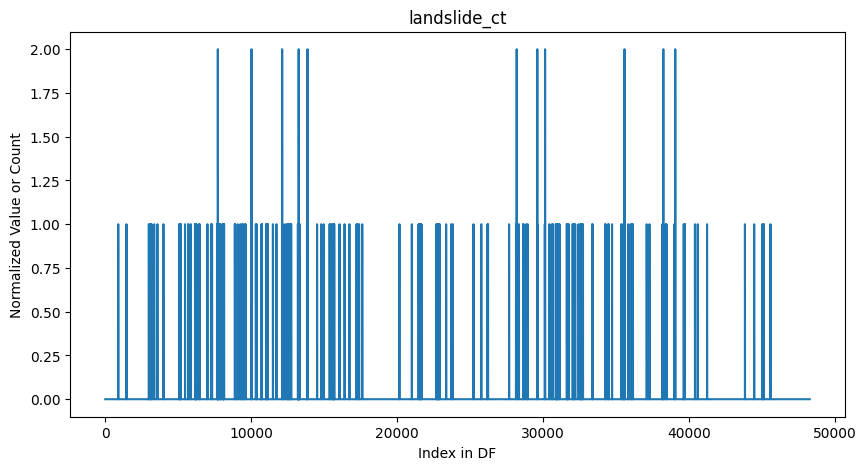

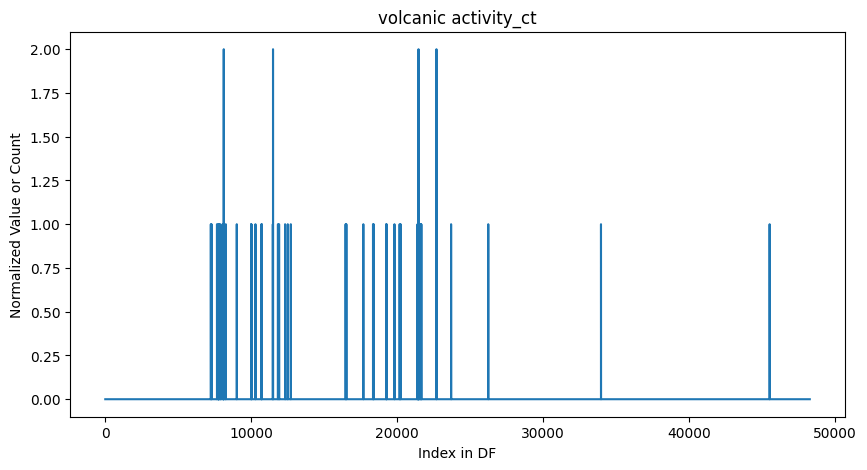

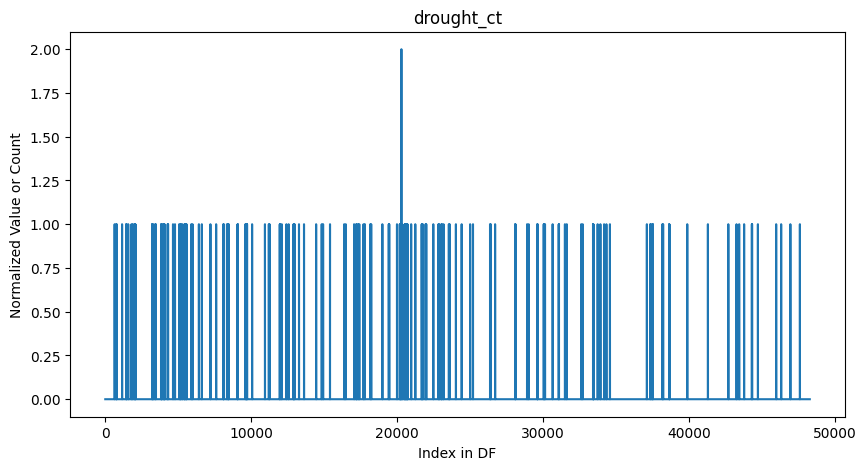

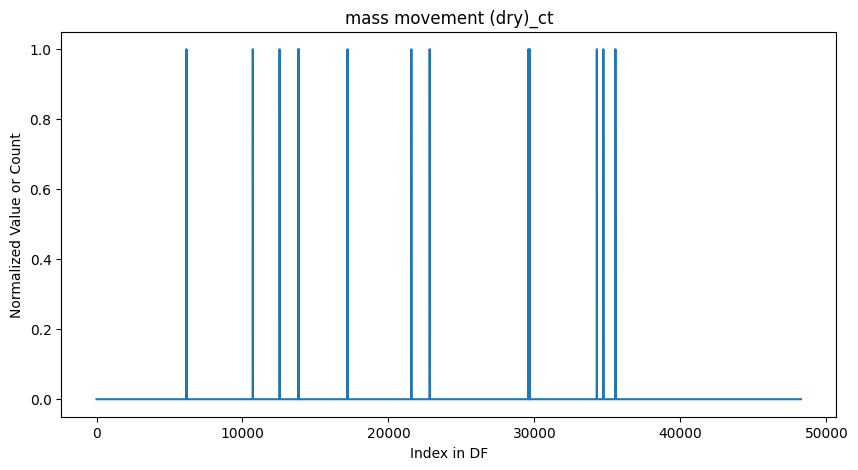

In [64]:
#Create Plots for the amounts and counts of each disaster type
xy_df_sub1.columns[2:18]
for i in range(2,18):
    plt.figure(figsize=(10,5))
    plt.plot(xy_df_sub1.iloc[:,i])
    plt.title(xy_df_sub1.columns[i])
    plt.xlabel('Index in DF')
    plt.ylabel('Normalized Value or Count')
    plt.show()


In [63]:
#index into the 18th row of the dataframe
xy_df_sub1.iloc[18]



grid_id           (45, 348)
year                   1978
flood_amt               0.0
storm_amt               0.0
earthquake_amt          0.0
                    ...    
763               -0.090109
764               -0.174031
765               -0.160151
766                0.071087
767                0.079622
Name: 18, Length: 795, dtype: object

In [39]:
#print the first 27 features of the dataset

for i in range(27):
    print(xy_df_sub1.columns[i], xy_df_sub1.iloc[0,i], xy_df_sub1.iloc[1,i], xy_df_sub1.iloc[2,i])


grid_id (45, 348) (45, 348) (45, 348)
year 1960 1961 1962
flood_amt 0.0 0.0 0.0
storm_amt 0.0 0.0 0.0
earthquake_amt 0.0 0.0 0.0
extreme temperature _amt 0.0 0.0 0.0
landslide_amt 0.0 0.0 0.0
volcanic activity_amt 0.0 0.0 0.0
drought_amt 0.0 0.0 0.0
mass movement (dry)_amt 0.0 0.0 0.0
flood_ct 0.0 0.0 0.0
storm_ct 0.0 0.0 0.0
earthquake_ct 0.0 0.0 0.0
extreme temperature _ct 0.0 0.0 0.0
landslide_ct 0.0 0.0 0.0
volcanic activity_ct 0.0 0.0 0.0
drought_ct 0.0 0.0 0.0
mass movement (dry)_ct 0.0 0.0 0.0
flood_bin 0.0 0.0 0.0
storm_bin 0.0 0.0 0.0
earthquake_bin 0.0 0.0 0.0
extreme temperature _bin 0.0 0.0 0.0
landslide_bin 0.0 0.0 0.0
volcanic activity_bin 0.0 0.0 0.0
drought_bin 0.0 0.0 0.0
mass movement (dry)_bin 0.0 0.0 0.0
target_flood_1 0.0 0.0 0.0


In [40]:
results={}

In [41]:
#try a simple baseline

#try a dumb model predicting just zeros 
y_base = np.zeros(len(y_test)) 
print('Dumb baseline AUC', metrics.roc_auc_score(y_test,y_base))
results['base1']=m.get_scores_clf(y_test,y_base)

#try a less dumb model predicting outcome = current flood outcome 
y_base2 = x_test['flood_bin'] 
print('Dumb baseline 2 AUC', metrics.roc_auc_score(y_test,y_base2))
results['base2']= m.get_scores_clf(y_test,y_base2)

Dumb baseline AUC 0.5
maximum f1 score, thres 0.49613724944320714 0.4
auc, f1, accu, accu_bl, precision, recall=  0.5 0.49613724944320714 0.9846674494094896 0.5 0.015332550590510394 0.0
[[14257     0]
 [  222     0]]
Dumb baseline 2 AUC 0.8074162399756843
maximum f1 score, thres 0.6188569873840768 0.4
auc, f1, accu, accu_bl, precision, recall=  0.8074162399756843 0.6188569873840768 0.9438497133779957 0.8074162399756845 0.11634722749860305 0.6666666666666666
[[13518   739]
 [   74   148]]


In [42]:
#logreg model 
y_pred, y_pred_prob = m.run_logreg(x_train, y_train, x_test)
results['logreg'] = m.get_scores_clf(y_test, y_pred_prob)

# print('Test AUC', metrics.roc_auc_score(y_test, y_pred_prob))

running log reg...


ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'C' parameter of LogisticRegression must be a float in the range (0, inf]. Got 0.0 instead.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 518, in _validate_data
    self._check_feature_names(X, reset=reset)
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 385, in _check_feature_names
    feature_names_in = _get_feature_names(X)
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1893, in _get_feature_names
    raise TypeError(
TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


In [ ]:
y_pred, y_pred_prob = m.run_xgb(x_train, y_train, x_test)
results['xgb'] = m.get_scores_clf(y_test, y_pred_prob)


running xgb...


KeyboardInterrupt: 

In [ ]:
print('Test AUC', metrics.roc_auc_score(y_test, y_pred_prob))

: 

In [ ]:
results= pd.DataFrame(results)
# results.to_clipboard(excel=True)
results

: 

## Adding climate data using google earth engine 
@Oscar you can take over from here :) 
- Goal: 
    - given a [grid_id, year] index, attach climate features obtained from GEE 
    - consider the following steps:
        1. grid_id: -> corresponding lat, and longitude box (see above digitalization code) 
        2. lat, long box: -> compute e.g. the center lat, lon of that box  
        3. lat, long, year -> try fetch features such as monthly temperature average
        4. attach to the dataset above, re-run models 
    - Sources: 
        - https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_MONTHLY 

- Alternative sources of climate data: 
    - https://psl.noaa.gov/data/gridded/ 
    - https://psl.noaa.gov/data/gridded/data.cmap.html 
    - https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation 

: 

New Functions

In [ ]:
def get_coords(df_pivot):
    
    """ Given the pivotted data, return a mapping of all the 
        grid_id's to their respective (lon, lat) coords"""
    
    grid_id_mapping = {}
    for idx, grid in zip(range(len(df_pivot)), df_pivot['grid_id']):

        if grid not in grid_id_mapping:
            grid_id_mapping[grid] = [(df_pivot['longitude'][idx], df_pivot['latitude'][idx])]
        else:
            grid_id_mapping[grid].append((df_pivot['longitude'][idx], df_pivot['latitude'][idx]))
            
    return grid_id_mapping    #return mapping

grid_id_mapping = get_coords(df_pivot)
print(grid_id_mapping[(99, 100)])

[(-80.94985591, 8.04055664), (-80.95057975, 8.038953034), (-80.42180942, 8.404421308)]


In [ ]:
def lat_long_box(ll1, ll2, ll3, ll4):
    
    """ Given 4 (lon, lat) tuples, compute the center of those tuples """
    
    lons = [ll1[0], ll2[0], ll3[0], ll4[0]]
    lats = [ll1[1], ll2[1], ll3[1], ll4[1]]
    
    # Compute the center longitude and latitude
    center_lon = sum(lons) / len(lons)
    center_lat = sum(lats) / len(lats)
    
    # Return the center as a tuple
    return center_lon, center_lat

print(lat_long_box((-80.94985591, 8.04055664), (-80.95057975, 8.038953034), (-80.42180942, 8.404421308), (-80.4123122, 8.432414)))

(-80.68363932, 8.2290862455)


In [ ]:
def get_features(grid_id, year, features):
    
    """ Given a grid_id, year, and a list of features,
        return the quantitave data on those features """
    
    
    # iterate through the DataFrame and check if the grid_id and year match
    for index, row in df_yrly.iterrows():
        if (row['grid_id'] == grid_id) and (row['year'] == year):
            filtered_data = df_yrly[(df_yrly['grid_id'] == grid_id) & (df_yrly['year'] == year)]

            feature_values = {}
            for feature in features: # loop through the given features
                if feature in df_yrly.columns:    # check if the feature exists in the data
                    value = filtered_data[feature].values[0]  
                    feature_values[feature] = value

                else:
                    # if the feature doesn't exist, return an error message
                    print(f"Error: {feature} feature does not exist in the data.")

            # return the dictionary of feature values
            return feature_values
        
    print(f"No data found for grid_id {grid_id} and year {year}")
    return {}

    

ex = get_features((44, 107), 2010, ['storm_c', 'earthquake_ct'])
print(ex)

Error: storm_c feature does not exist in the data.
{'earthquake_ct': 0}


Import New Dataset

In [65]:
UID = '186009'
API_key = 'e6d9a63d-66b9-4cc1-a075-1c36da7862e3'

In [66]:
#Write the keys into the file ~/.cdsapirc in the home directory of your user
import os
with open(os.path.join(os.path.expanduser('~'), '.cdsapirc2'), 'w') as f:
    f.write('url: https://cds.climate.copernicus.eu/api/v2\n')
    f.write(f'key: {UID}:{API_key}')

In [68]:
import cdsapi
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'grib',
        'variable': [
            'convective_snowfall', 'evaporation', 'high_vegetation_cover',
            'mean_runoff_rate', 'mean_sea_level_pressure', 'mean_surface_downward_uv_radiation_flux',
            'mean_surface_runoff_rate', 'mean_total_precipitation_rate', 'mean_wave_period',
            'runoff', 'sea_surface_temperature', 'snowfall',
            'snowmelt', 'soil_temperature_level_1', 'soil_temperature_level_2',
            'soil_temperature_level_3', 'soil_temperature_level_4', 'surface_pressure',
            'surface_runoff', 'total_cloud_cover', 'total_column_cloud_liquid_water',
            'total_column_rain_water', 'total_column_snow_water', 'total_column_water',
            'total_precipitation', 'vertical_integral_of_temperature',
        ],
        'year': [
            '1940', '1941', '1942',
            '1943', '1944', '1945',
            '1946', '1947', '1948',
            '1949', '1950', '1951',
            '1952', '1953', '1954',
            '1955', '1956', '1957',
            '1958', '1959', '1960',
            '1961', '1962', '1963',
            '1964', '1965', '1966',
            '1967', '1968', '1969',
            '1970', '1971', '1972',
            '1973', '1974', '1975',
            '1976', '1977', '1978',
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
            '2021', '2022', '2023',
        ],
        'month': '02',
        'day': '01',
        'time': '00:00',
    },
    'download.grib')



Exception: Missing/incomplete configuration file: C:\Users\samin/.cdsapirc